# Analysis of Amazon Bestselling Books 2009-2019

[Dataset](https://www.kaggle.com/datasets/sootersaalu/amazon-top-50-bestselling-books-2009-2019) on Amazon's Top 50 bestselling books from 2009 to 2019 downloaded from Kaggle. 
The dataset contains 550 books and data has been categorized into fiction and non-fiction using Goodreads.

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Import dataset from a csv file
books = pd.read_csv('bestsellers with categories.csv')
books.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


## Preprocessing

Let's take a quick look at data summaries and explore data types. Also search the columns for possible missing values.

In [3]:
books.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


In [4]:
# loop through the columns and check the missing values
for col in books.columns:
    missing = books[col].isnull().sum()
    print(f'{col} -> {missing}')

Name -> 0
Author -> 0
User Rating -> 0
Reviews -> 0
Price -> 0
Year -> 0
Genre -> 0


In [5]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


Unify similar data with different spelling and check the existance of punctuations.


In [6]:
books[books.Author == 'J. K. Rowling']

,Name,Author,User Rating,Reviews,Price,Year,Genre
155,Harry Potter and the Goblet of Fire: The Illus...,J. K. Rowling,4.9,7758,18,2019,Fiction
159,Harry Potter Paperback Box Set (Books 1-7),J. K. Rowling,4.8,13471,52,2016,Fiction


In [7]:
books[books.Author == 'J.K. Rowling']

,Name,Author,User Rating,Reviews,Price,Year,Genre
102,Fantastic Beasts and Where to Find Them: The O...,J.K. Rowling,4.7,4370,15,2016,Fiction
153,Harry Potter and the Chamber of Secrets: The I...,J.K. Rowling,4.9,19622,30,2016,Fiction
154,"Harry Potter and the Cursed Child, Parts 1 & 2...",J.K. Rowling,4.0,23973,12,2016,Fiction
156,Harry Potter and the Prisoner of Azkaban: The ...,J.K. Rowling,4.9,3146,30,2017,Fiction
157,Harry Potter and the Sorcerer's Stone: The Ill...,J.K. Rowling,4.9,10052,22,2016,Fiction
353,The Casual Vacancy,J.K. Rowling,3.3,9372,12,2012,Fiction


In [8]:
books.loc[books.Author == 'J. K. Rowling', 'Author'] = 'J.K. Rowling'
books.loc[books.Author == 'George R. R. Martin', 'Author'] = 'George R.R. Martin'

In [9]:
books['name_len'] = books['Name'].apply(lambda x: len(x) - x.count(" ")) # subtract whitespaces

In [10]:
import string

punctuations = string.punctuation
print('list of punctuations : ', punctuations)

list of punctuations :  !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [11]:
# percentage of punctuations
def count_punc(text):
    """This function counts the number of punctuations in a text"""
    count = sum(1 for char in text if char in punctuations)
    return round(count/(len(text) - text.count(" "))*100, 3)

In [12]:
# Check the percentage of punctuations through Name column
books['punc%'] = books['Name'].apply(lambda x: count_punc(x))
books.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre,name_len,punc%
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction,26,3.846
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction,15,20.000
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction,32,3.125
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction,20,10.000
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction,59,10.169


## Data Analysis

In [13]:
no_dup = books.drop_duplicates('Name')
g_count = no_dup['Genre'].value_counts()

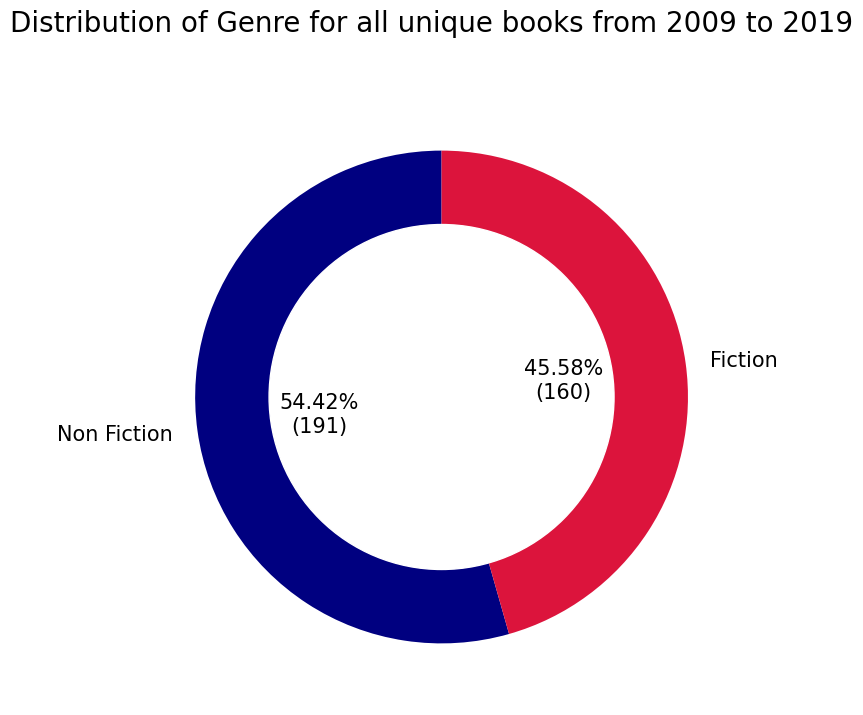

In [14]:
# Figure the distribution of genre for all unique books from 2009 to 2019
fig, ax = plt.subplots(figsize=(8, 8))

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%\n({v:d})'.format(p=pct,v=val)
    return my_autopct

genre_col = ['navy','crimson']
center_circle = plt.Circle((0, 0), 0.7, color='white')
plt.pie(x=g_count.values, labels=g_count.index, autopct=make_autopct(g_count.values), 
        startangle=90, textprops={'size': 15}, pctdistance=0.5, colors=genre_col)

ax.add_artist(center_circle)
fig.suptitle('Distribution of Genre for all unique books from 2009 to 2019', fontsize=20)
plt.show()

In [15]:
y1 = np.arange(2009, 2014)
y2 = np.arange(2014, 2020)
g_count = books['Genre'].value_counts()

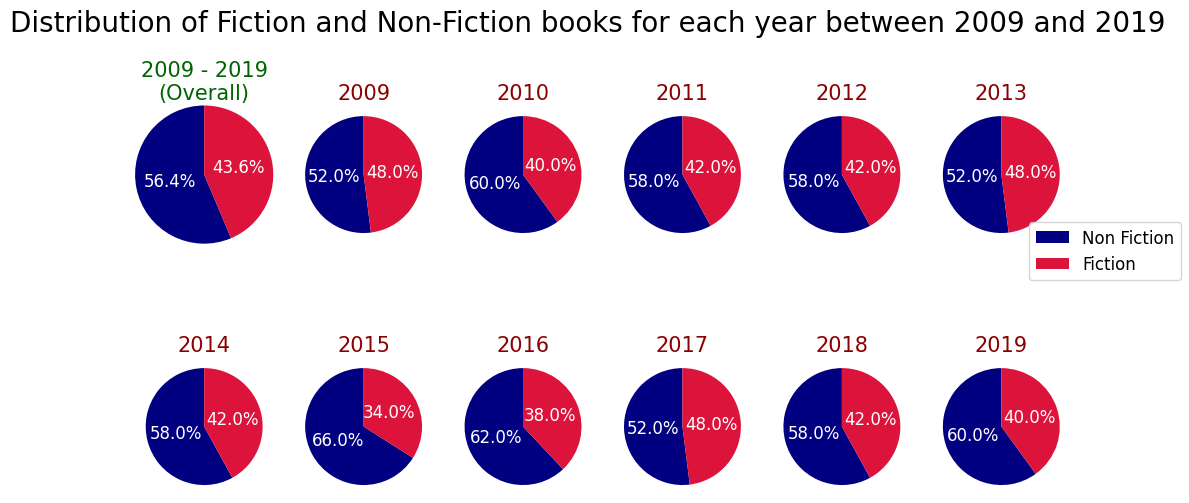

In [16]:
#Let's visualize the above analysis for each year.
fig, ax = plt.subplots(2, 6, figsize=(12,6))

ax[0,0].pie(x=g_count.values, labels=None, autopct='%1.1f%%',
            startangle=90, textprops={'size': 12, 'color': 'white'},
            pctdistance=0.5, radius=1.3, colors=genre_col)
ax[0,0].set_title('2009 - 2019\n(Overall)', color='darkgreen', fontdict={'fontsize': 15})

for i, year in enumerate(y1):
    counts = books[books['Year'] == year]['Genre'].value_counts()
    ax[0,i+1].pie(x=counts.values, labels=None, autopct='%1.1f%%',
                  startangle=90, textprops={'size': 12,'color': 'white'},
                  pctdistance=0.5, colors=genre_col, radius=1.1)
    ax[0,i+1].set_title(year, color='darkred', fontdict={'fontsize': 15})
    
for i, year in enumerate(y2):
    counts = books[books['Year'] == year]['Genre'].value_counts()
    ax[1,i].pie(x=counts.values, labels=None, autopct='%1.1f%%',
                startangle=90, textprops={'size': 12,'color': 'white'},
                pctdistance=0.5, colors=genre_col, radius=1.1)
    ax[1,i].set_title(year, color='darkred', fontdict={'fontsize': 15})
    
plt.suptitle('Distribution of Fiction and Non-Fiction books for each year between 2009 and 2019',
             fontsize=20)
fig.legend(g_count.index, loc='center right', fontsize=12)
plt.show()

Bestselling authors are selected based on their presence in the top 50 bestselling books of each year, from 2009 to 2019.
Now let's look at the top 10 bestselling authors in both fiction and non-fiction categories.

In [17]:
# The top 10 bestselling authors in non-fiction
best_nonfic_authors = books.groupby(['Author', 'Genre']).agg({'Name':'count'}).unstack()['Name', 'Non Fiction'].sort_values(ascending=False)[:11]

# The top 10 bestselling authors in fiction
best_fic_authors = books.groupby(['Author', 'Genre']).agg({'Name':'count'}).unstack()['Name', 'Fiction'].sort_values(ascending=False)[:11]

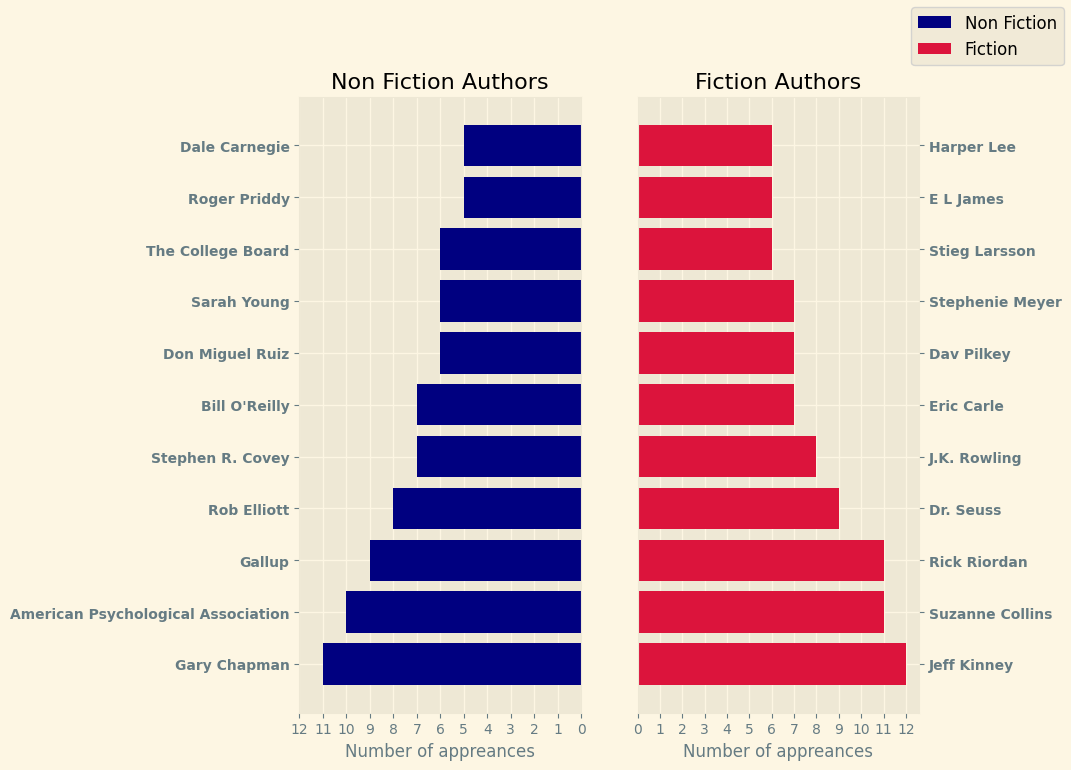

In [18]:
with plt.style.context('Solarize_Light2'):
    fig, ax = plt.subplots(1, 2, figsize=(8,8))
    ax[0].barh(y=best_nonfic_authors.index, width=best_nonfic_authors.values, color=genre_col[0])
    ax[0].invert_xaxis()
    ax[0].yaxis.tick_left()
    ax[0].set_yticks(np.arange(len(best_nonfic_authors)))
    ax[0].set_yticklabels(best_nonfic_authors.index, fontsize=10, fontweight='semibold')
    ax[0].set_xticks(np.arange(max(best_fic_authors.values)+1))
    ax[0].set_xlabel('Number of appreances')
    ax[0].set_title('Non Fiction Authors')
    
    ax[1].barh(y=best_fic_authors.index, width=best_fic_authors.values, color=genre_col[1])
    ax[1].set_xticks(np.arange(max(best_fic_authors.values)+1))
    ax[1].yaxis.tick_right()
    ax[1].set_yticks(np.arange(len(best_fic_authors)))
    ax[1].set_yticklabels(best_fic_authors.index, fontsize=10, fontweight='semibold')
    ax[1].set_title('Fiction Authors')
    ax[1].set_xlabel('Number of appreances')
    
    fig.legend(['Non Fiction', 'Fiction'], fontsize=12)
plt.show()

Bestselling authors are selected based on their presence in the top 50 bestselling books of each year. The number of attendance includes duplicate names of books.Below are a number of unique posts and general reviews from these authors.

In [19]:
n_best = 20

top_authors = books.Author.value_counts().nlargest(n_best)

# removes all rows with duplicate book names
no_dup = books.drop_duplicates('Name') 

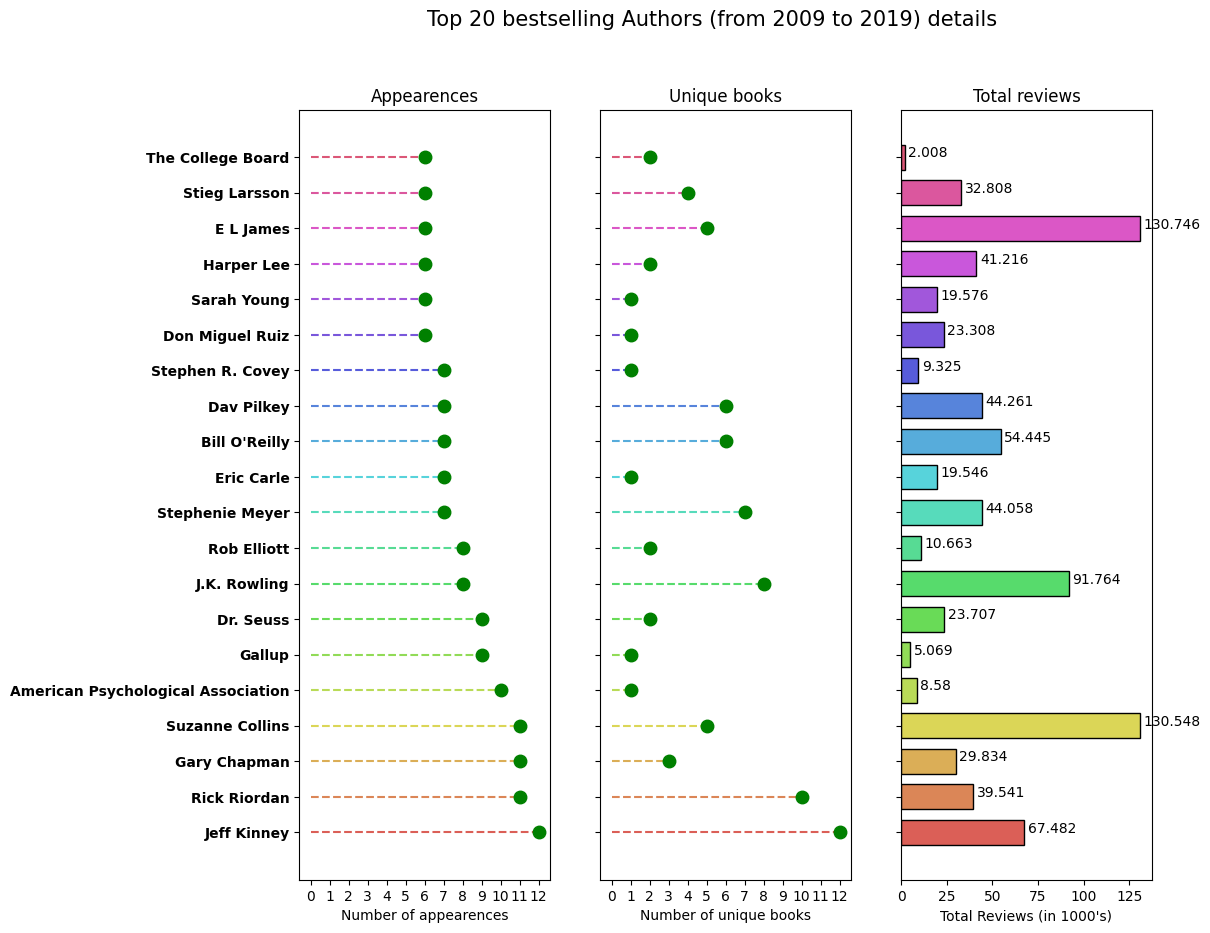

In [20]:
# Top 20 bestselling Authors (from 2009 to 2019) details
fig, ax = plt.subplots(1, 3, figsize=(11,10), sharey=True)
color = sns.color_palette("hls", n_best)

ax[0].hlines(y=top_authors.index , xmin=0, xmax=top_authors.values, color=color, linestyles='dashed')
ax[0].plot(top_authors.values, top_authors.index, 'go', markersize=9)
ax[0].set_xlabel('Number of appearences')
ax[0].set_xticks(np.arange(top_authors.values.max()+1))
ax[0].set_yticks(np.arange(len(top_authors.values)))
ax[0].set_yticklabels(top_authors.index, fontweight='semibold')
ax[0].set_title('Appearences')

book_count = []
total_reviews = []

for name, col in zip(top_authors.index, color):
    book_count.append(len(no_dup[no_dup.Author == name]['Name']))
    total_reviews.append(no_dup[no_dup.Author == name]['Reviews'].sum()/1000)
    
    
ax[1].hlines(y=top_authors.index , xmin=0, xmax=book_count, color=color, linestyles='dashed')
ax[1].plot(book_count, top_authors.index, 'go', markersize=9)
ax[1].set_xlabel('Number of unique books')
ax[1].set_xticks(np.arange(max(book_count)+1))
ax[1].set_title('Unique books')

ax[2].barh(y=top_authors.index, width=total_reviews, color=color, edgecolor='black', height=0.7)
for name, val in zip(top_authors.index, total_reviews):
    ax[2].text(val+2, name, val)
    ax[2].set_xlabel("Total Reviews (in 1000's)")
    ax[2].set_title('Total reviews')
    
plt.suptitle('Top 20 bestselling Authors (from 2009 to 2019) details', fontsize=15)
plt.show()

Jeff Kinney with 12 unique books is the bestselling author from 2009 to 2019 with 12 appearances in bestselling books.
And after that, Rick Riordan with 10 unique books is the second bestselling author with 11 appearances in bestselling books.
The highest total review belongs to E L James with 130,746 reviews and she has been on the top 50 bestselling author list 6 times with 5 books.